In [168]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
def sine(x,t):
    n=1
    sum=0
    while n<=t:
        sum+=((-1)**n)*(x**(2*n+1))/m.factorial(2*n+1)
        n+=1
    return sum

n=1
x=float(input('输入参变量:\n'))
while abs(((-1)**n)*(x**(2*n+1))/m.factorial(2*n-1))>=10**(-7)*abs(sine(x,n)):
    n+=1
print('截止项:%d' %n)
print(sine(x,n),m.sin(x))
print(sine(x,n)-m.sin(x))

输入参变量:
2
截止项:8
-1.090702573170049 0.9092974268256817
-1.9999999999957307


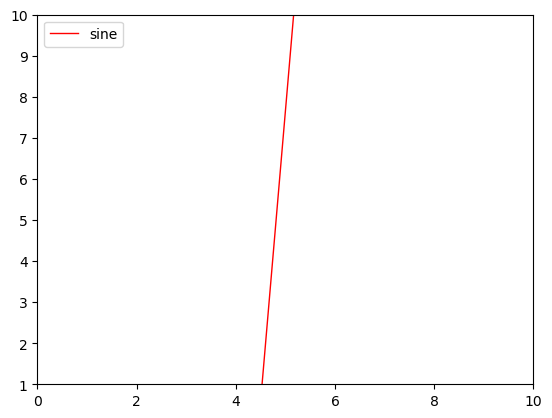

In [166]:
#绘制
plt.xlim((0,10))
plt.ylim((1,10))
x = np.linspace(0,10,10)
plt.plot(x,sine(x,2),'r-',linewidth=1,label='sine(x,2)')
plt.legend(['sine'], loc='upper left')
plt.show()

/tmp/ipykernel_55/3429055267.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

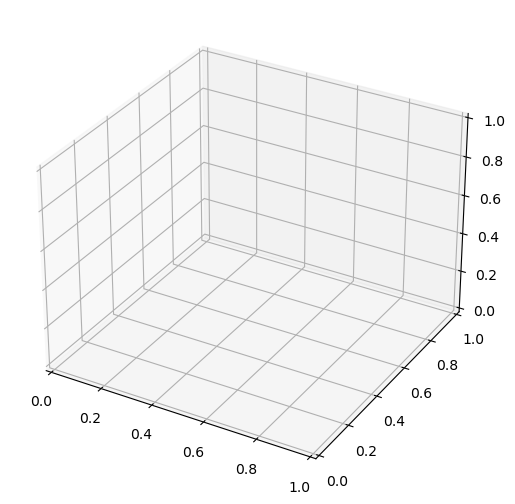

In [169]:
fig=plt.figure()
ax=Axes3D(fig)
X = np.arange(0,20,0.25)
Y = np.arange(0,20,0.25)
Z = sine(Y,X)
ax.plot(X,Y,Z,color='red',linestyle="--")
plt.show()

In [172]:
def str_add(a, b):
    ta = list(a)    #字符串转列表
    tb = list(b)
    ta = [int(i) for i in ta]   #列表元素转整型
    tb = [int(i) for i in tb]
    ta = list(reversed(ta))     #列表元素反转，个位放在列表低位
    tb = list(reversed(tb))
    mlen = max(len(ta), len(tb))
    ta += [0]*(mlen-len(ta))    #运算数据对齐
    tb += [0]*(mlen-len(tb))
    y = [0]*(mlen+1)
    for i in range(0, mlen):    #大数加法算法
        y[i] += ta[i] + tb[i]
        y[i+1] = int(y[i]/10)
        y[i] %= 10
    if y[mlen] == 0:            #去掉未进位的和最高位0
        y.pop()
    y = list(reversed(y))       #和反转，最高位放列表低位
    y = [str(i) for i in y]     #列表元素转换为字符
    y = ''.join(y)      #结果从列表转为字符串
 
    return y

In [173]:
import math
 
 
class Number(object):
    def __init__(self, num, cr):
        self.num = num  # 大数的值，字符串表示
        self.cr = cr    # 大数的符号，1代表正，-1代表负
 
    def print_bignum(self):
        if self.num == '0':
            print('0')
            return
        if self.cr < 0:
            print('-', self.num)
        else:
            print(self.num)
 
 
def sub(x, y):
    xnum = [int(i) for i in x]
    ynum = [int(i) for i in y]
    xnum = list(reversed(xnum))
    ynum = list(reversed(ynum))
    ynum += [0] * (len(xnum) - len(ynum))
    znum = [0]*len(xnum)
    for i in range(0, len(xnum)):
        znum[i] = xnum[i] - ynum[i]
        if znum[i] < 0:
            xnum[i+1] -= 1
            znum[i] += 10
    for i in reversed(znum[1:]):
        if i == 0:
            znum.pop()
        else:
            break
    znum = list(reversed(znum))
    znum = [str(i) for i in znum]
    return ''.join(znum)
 
 
def subtract(x, y, z):
    xnum = list(x.num)
    ynum = list(y.num)
    if len(xnum) < len(ynum):
        z.cr = -1
        z.num = sub(ynum, xnum)
    elif len(xnum) == len(ynum):
        for i in range(0, len(xnum)):
            if xnum[i] < ynum[i]:
                z.cr = -1
                z.num = sub(ynum, xnum)
                return z
        z.num = sub(xnum, ynum)
    else:
        z.num = sub(xnum, ynum)
    return z
 
 
def str_add(a, b):
    ta = list(a)    # 字符串转列表
    tb = list(b)
    ta = [int(i) for i in ta]   # 列表元素转整型
    tb = [int(i) for i in tb]
    ta = list(reversed(ta))     # 列表元素反转，个位放在列表低位
    tb = list(reversed(tb))
    mlen = max(len(ta), len(tb))
    ta += [0]*(mlen-len(ta))    # 运算数据对齐
    tb += [0]*(mlen-len(tb))
    y = [0]*(mlen+1)
    for i in range(0, mlen):    # 大数加法算法
        y[i] += ta[i] + tb[i]
        y[i+1] = int(y[i]/10)
        y[i] %= 10
    if y[mlen] == 0:            # 去掉未进位的和最高位0
        y.pop()
    y = list(reversed(y))       # 和反转，最高位放列表低位
    y = [str(i) for i in y]     # 列表元素转换为字符
    y = ''.join(y)      # 结果从列表转为字符串
    return y
 
 
def mix_ar(x, y):   # 判断两个加数的符号，结合纯加法和纯减法算法进行计算
    z = Number(0, 0)
    if x.cr < 0 and y.cr < 0:
        z.cr = -1
        z.num = str_add(x.num, y.num)
    elif x.cr < 0 and y.cr > 0:
        subtract(y ,x, z)
    elif x.cr > 0 and y.cr < 0:
        subtract(x, y, z)
    else:
        z.cr = 1
        z.num = str_add(x.num, y.num)
    return z
 
 
a = Number('1000', 1)   # 测试用例
b = Number('999', 1)
z = mix_ar(a, b)
z.print_bignum()

1999


In [174]:
def solution(line):
    a,b = line.strip().split()
    a = [int(item) for item in a]
    b = [int(item) for item in b]
    res = ''
    for i in range(len(b)):
        flag_a = len(a)-1-i
        flag_b = len(b)-1-i
        if a[flag_a]>= b[flag_b]:
            res = str(a[flag_a]-b[flag_b])+res
        else:
            res = str(10+a[flag_a]-b[flag_b])+res
            while a[flag_a-1]==0:
                a[flag_a-1]=9
                flag_a -= 1
            a[flag_a-1] -= 1
    for j in range(len(a)-1-i-1,-1,-1):
        res = str(a[j])+res
    zero_flag=0
    for i in range(len(res)):
        if res[i]!='0':
            zero_flag=1
            break
    if zero_flag==0:
        return 0
    return res[i:]

findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans.


Fx: 4*sin(x)/pi + 4*sin(3*x)/(3*pi) + 4*sin(5*x)/(5*pi) + 4*sin(7*x)/(7*pi)


/home/jesse_chen/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20613 (\N{CJK UNIFIED IDEOGRAPH-5085}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jesse_chen/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jesse_chen/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21494 (\N{CJK UNIFIED IDEOGRAPH-53F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jesse_chen/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jesse_chen/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570})

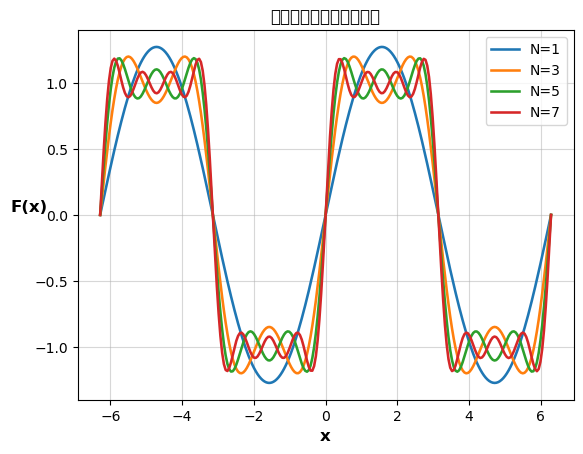

In [1]:
""" 傅里叶级数"""
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

N = 8  # 拟合的阶数

L = sym.pi  # 周期的一半
n, x = sym.symbols('n x')  # 创建符号

fx = sym.sign(x)  # 创建符号表达式 即要进行傅里叶级数分解的函数， 这里采用的是 符号函数


a0 = (1/(2*L))*sym.integrate(fx, (x, -L, L))
an = (1/L)*sym.integrate(fx*sym.cos((n*sym.pi*x)/(L)), (x, -L, L))
bn = (1/L)*sym.integrate(fx*sym.sin((n*sym.pi*x)/(L)), (x, -L, L))

a = []
b = []
a.append(a0)
b.append(0)

for i in range(1, N):
    a.append(an.subs(n, i))
    b.append(bn.subs(n, i))


# 绘图 x轴范围设置
t = np.linspace(-2*np.pi, 2*np.pi, 256, endpoint=True)

Fx = a0
for i in range(1, N):
    if a[i] == 0 and b[i] == 0:
        continue
    
    # 累加 计算 Fx
    Fx = Fx + a[i]*sym.cos((i*sym.pi*x)/(L)) + b[i]*sym.sin((i*sym.pi*x)/(L))

    # 绘图使用
    y = []
    for j in t:
        y.append(Fx.subs(x, j))

    plt.plot(t, y, linewidth=0.5*(10-j), label='N={}'.format(i))


# 打印输出 各项的系数 以及 傅里叶级数表达式
# print('an:', a)
# print('bn:', b)
print('Fx:',Fx)


# 设置 图像字体信息
img_font = {'family': 'Microsoft YaHei',
            'size': 12,
            'weight': 'bold',
            }

# 图像显示设置
plt.legend(loc='upper right')
plt.title("傅里叶级数拟合符号函数", fontproperties=img_font)
plt.xlabel("x", fontproperties=img_font)
plt.ylabel("F(x)", fontproperties=img_font, rotation=360)
plt.grid(alpha=0.5)

plt.show()

In [137]:
def sine_2(x,n):
    sum=0
    for i in range(1,n):
        sum=sum+((-1)**(n-1))*(x**(2*n-1))/m.factorial(2*n-1)
    print(sum)
print(sine_2(2,3))
print(m.sin(2))

0.5333333333333333
None
0.9092974268256817


/tmp/ipykernel_55/734415551.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


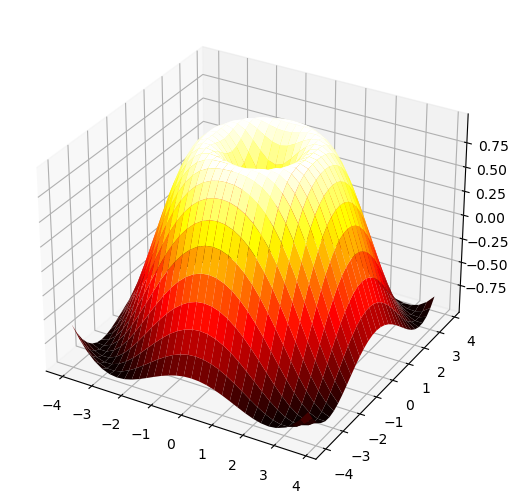

In [138]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

show()